# Excercise 3

In this excercise we have implemented continious distributions by using uniform distribution.

Exercise 3
1. Generate simulated values from the following distributions

     (a) Exponential distribution

     (b) Normal distribution (at least with standard Box-Mueller)

     (c) Pareto distribution, with β = 1 and experiment with
different values of k values: k = 2.05, k = 2.5, k = 3 and
k = 4.

Verify the results by comparing histograms with analytical
results and perform tests for distribution type.

2. For the Pareto distribution with support on [β,∞[ compare
mean value and variance, with analytical results, which can be
calculated as E(X) = β
k
k−1
(for k > 1) and
Var(X) = β
2 k
(k−1)2(k−2) (for k > 2). Explain problems if any.

3. For the normal distribution generate 100 95% confidence
intervals for the mean and variance, each based on 10
observations. Discuss the results.
4. Simulate from the Pareto distribution using composition

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from random import randrange
from math import log
import scipy

# Part1
# (a) Exponential distribution

In this part we have used the inverskion method to produce an exponential distribution. The idea is that we can teke the inverse of the initial uniform distribution by applying the inverse of the function of the exponential distribution at the initial sample.

In [4]:
def Exponential_distribution(sample_size, lam):
    exp = [-math.log(np.random.uniform(0,1,1)[0])/lam for x in range(sample_size)]
    return exp


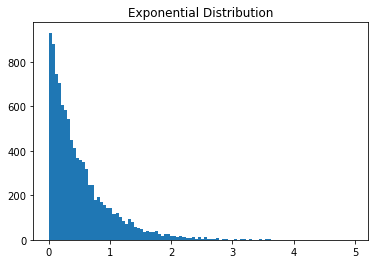

In [5]:
plt.hist(Exponential_distribution(10000,2),100)
plt.title('Exponential Distribution')
plt.show()

# b) Normal distribution 

In this excersise we have implemented the normal distribution by using the box-Muller method. In the box Muller method we are sampling from two uniform distributions and get the new sample is the result of the expression $\sqrt{-2log(U_i)}cos(2pU_2)$

In [6]:
from math import cos,pi
def normal_box_muler(sample_size):
    sample = [((-2*log(np.random.uniform(0,1,1)[0]))**(1/2))*cos(2*pi*np.random.uniform(0,1,1)[0]) for i in range(sample_size)]
    return sample

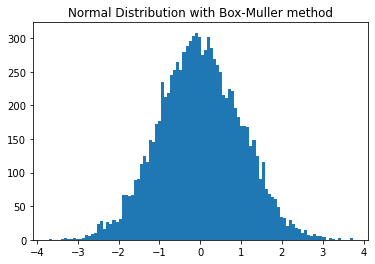

In [7]:
plt.hist(normal_box_muler(10000),100)
plt.title('Normal Distribution with Box-Muller method')

plt.show()


# (c) Pareto distribution

Here we apply the same method as in the part 1 a)

In [8]:
def pareto_distribution(k):
    beta = 1
    sample_size = 100000
    pareto = list()
    pareto = [beta*(np.random.uniform(0,1,1)[0]**(-1/k)) for x in range(sample_size)]
    return pareto

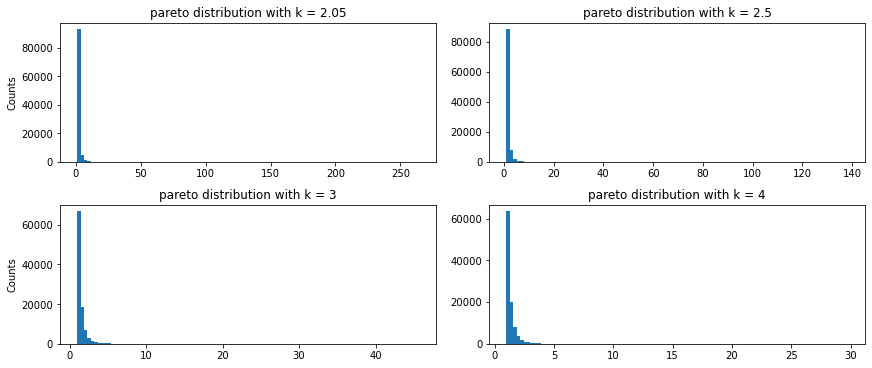

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), constrained_layout = True)
axes[0][0].hist(pareto_distribution(2.05), 100)
axes[0][0].set_title('pareto distribution with k = 2.05')
axes[0][0].set_ylabel('Counts')
axes[0][1].hist(pareto_distribution(2.5), 100)
axes[0][1].set_title('pareto distribution with k = 2.5')
axes[1][0].hist(pareto_distribution(3), 100)
axes[1][0].set_title('pareto distribution with k = 3')
axes[1][0].set_ylabel('Counts')
axes[1][1].hist(pareto_distribution(4), 100)
axes[1][1].set_title('pareto distribution with k = 4')
plt.show()

# Part 2

In [10]:
K = [2.05, 2.5, 3, 4]
B = 1
analitycal_mean = list()
analitycal_var = list()
for k in K:
    analitycal_mean.append(B*(k/(k-1)))
    analitycal_var.append((B**2)*(k/(((k-1)**2)*(k-2))))
    
our_mean = list()
our_var = list() 
for k in K:
    our_mean.append(np.mean(pareto_distribution(k)))
    our_var.append(np.var(pareto_distribution(k)))

    

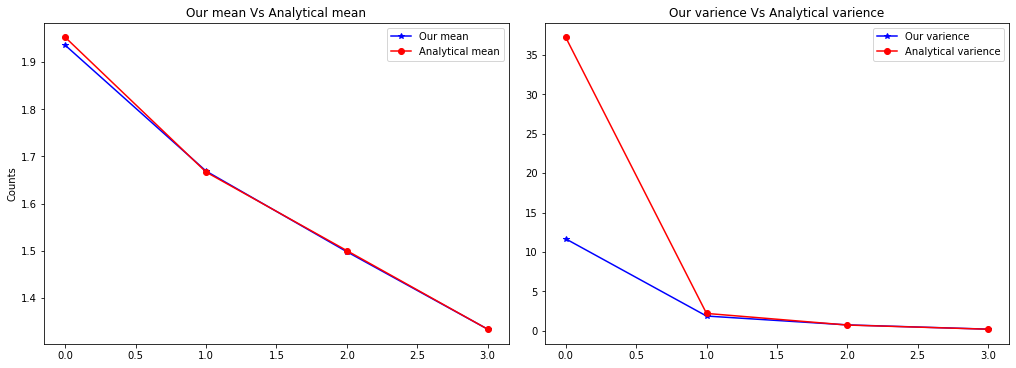

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), constrained_layout = True)
axes[0].plot(our_mean,color='blue', marker='*')
axes[0].plot(analitycal_mean, color='red', marker='o')
axes[0].legend(['Our mean', 'Analytical mean'])
axes[0].set_title('Our mean Vs Analytical mean')
axes[0].set_ylabel('Counts')
axes[1].plot(our_var,color='blue', marker='*')
axes[1].plot(analitycal_var, color='red', marker='o')
axes[1].legend(['Our varience', 'Analytical varience'])
axes[1].set_title('Our varience Vs Analytical varience')
plt.show()

The simulated and the analytical mean are almost the same while for small variances we have lower empiricalvalues.

# Part 3

Text(0.5, 1.0, '100 95% confidence intervals for the variance, each based on 10 observations')

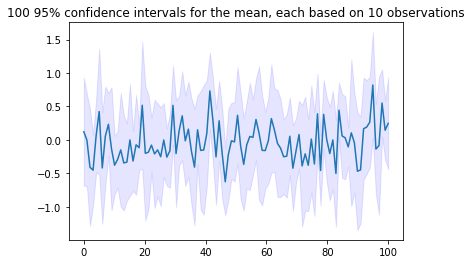

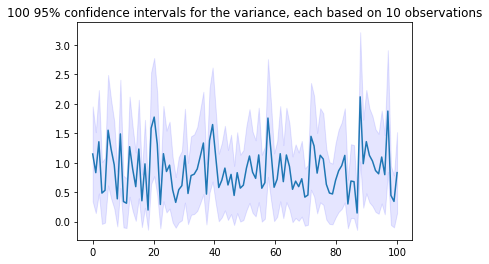

In [12]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def var_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.var(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

ci_means = list()
ci_means_down = list()
ci_means_up = list()
ci_vars = list()
ci_vars_down = list()
ci_vars_up = list()
s = 10
for i in range(100):
    sample = normal_box_muler(10)
    ci = mean_confidence_interval(sample)
    ci_means.append(ci[0])
    ci_means_down.append(ci[1])
    ci_means_up.append(ci[2])
    ci = var_confidence_interval(sample)
    ci_vars.append(ci[0])
    ci_vars_down.append(ci[1])
    ci_vars_up.append(ci[2])

# Plotting
x = np.linspace(0, 100, 100)
fig, ax = plt.subplots()
ax.plot(x,ci_means)
ax.fill_between(x, (ci_means_down), (ci_means_up), color='b', alpha=.1)
ax.set_title('100 95% confidence intervals for the mean, each based on 10 observations')
fig, ax = plt.subplots()
ax.plot(x,ci_vars)
ax.fill_between(x, (ci_vars_down), (ci_vars_up), color='b', alpha=.1)
ax.set_title('100 95% confidence intervals for the variance, each based on 10 observations')

For small samples like ours the variances and the means are very noisy. The mean of the means is around zero and the mean o

# 4

In [13]:
B = 1
K = [2.05, 2.5, 3, 4]
pareto = list()
for k in K:
    pareto.append([B*(x**(-1/k)-1) for x in rnds])

# Plotting
x = np.linspace(0, 10000, 10000)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(15, 3)
fig.suptitle('Pareto distributions for k=2.05, k=2.5, k=3 and k=4')

y = pareto[0]
ax1.hist(y, bins=100)

y = pareto[1]
ax2.hist(y, bins=100)

y = pareto[2]
ax3.hist(y, bins=100)

y = pareto[3]
ax4.hist(y, bins=100)

NameError: name 'rnds' is not defined